In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

from sklearn.datasets import load_digits
from sklearn import decomposition


In [6]:
digits = load_digits()
X = digits.data
y = digits.target

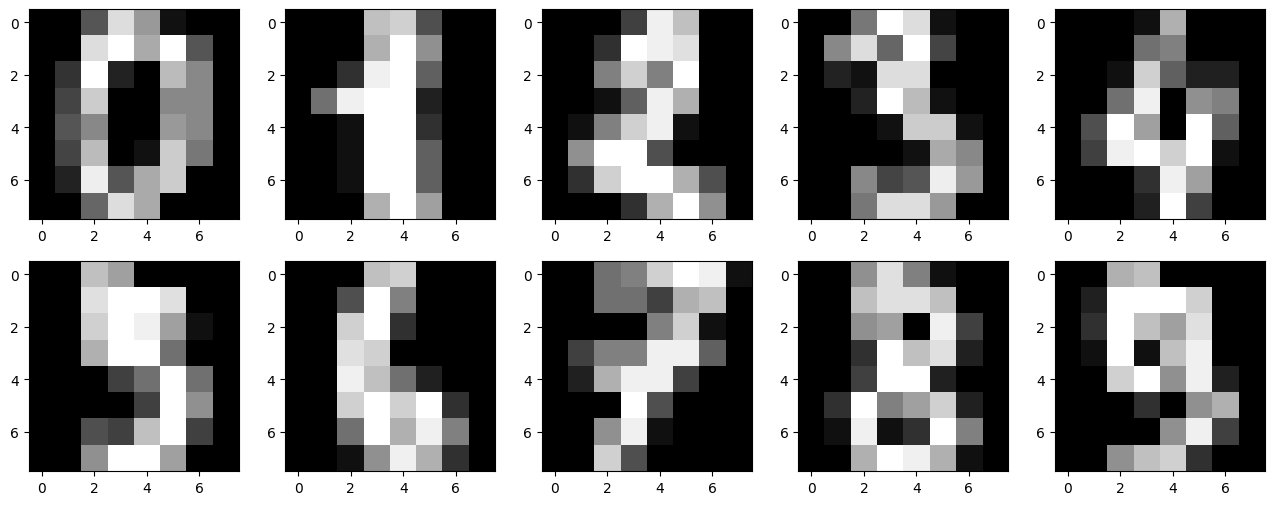

In [9]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

Our data has 64 dimensions, but we are going to reduce it to only 2 and see that, even with just 2 dimensions, we can clearly see that digits separate into clusters.



Projecting 64-dimensional data to 2D


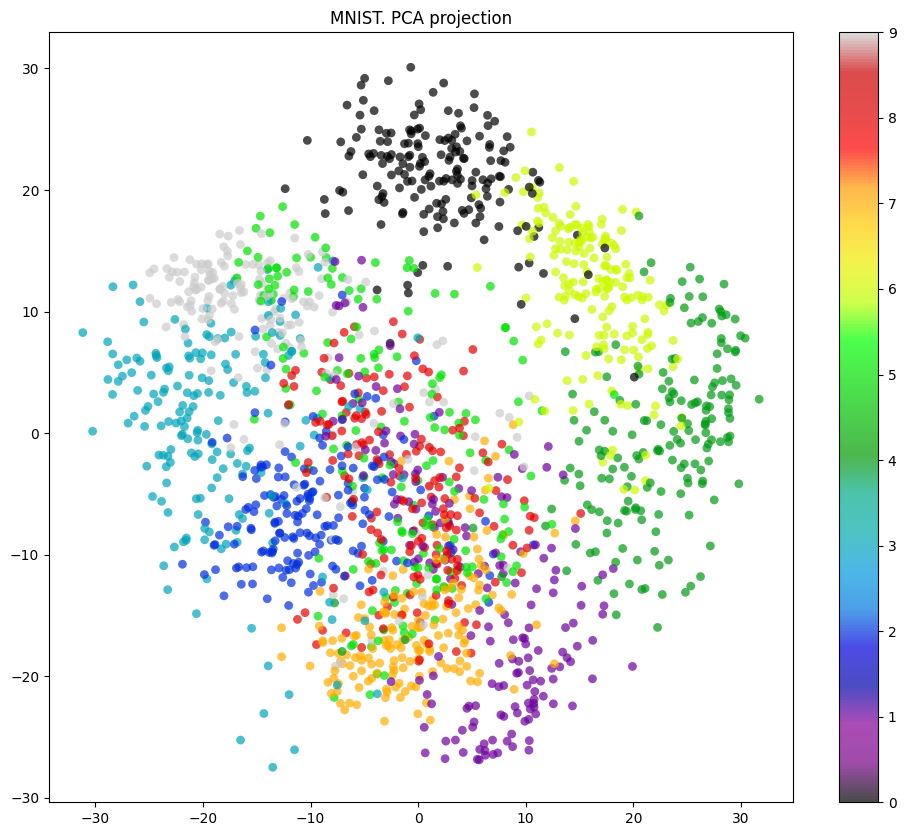

In [25]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=colormaps['nipy_spectral'])
plt.colorbar()
plt.title('MNIST. PCA projection')
plt.show()

Indeed, with t-SNE, the picture looks better since PCA has a linear constraint while t-SNE does not. However, even with such a small dataset, the t-SNE algorithm takes significantly more time to complete than PCA.

Text(0.5, 1.0, 'MNIST. t-SNE projection')

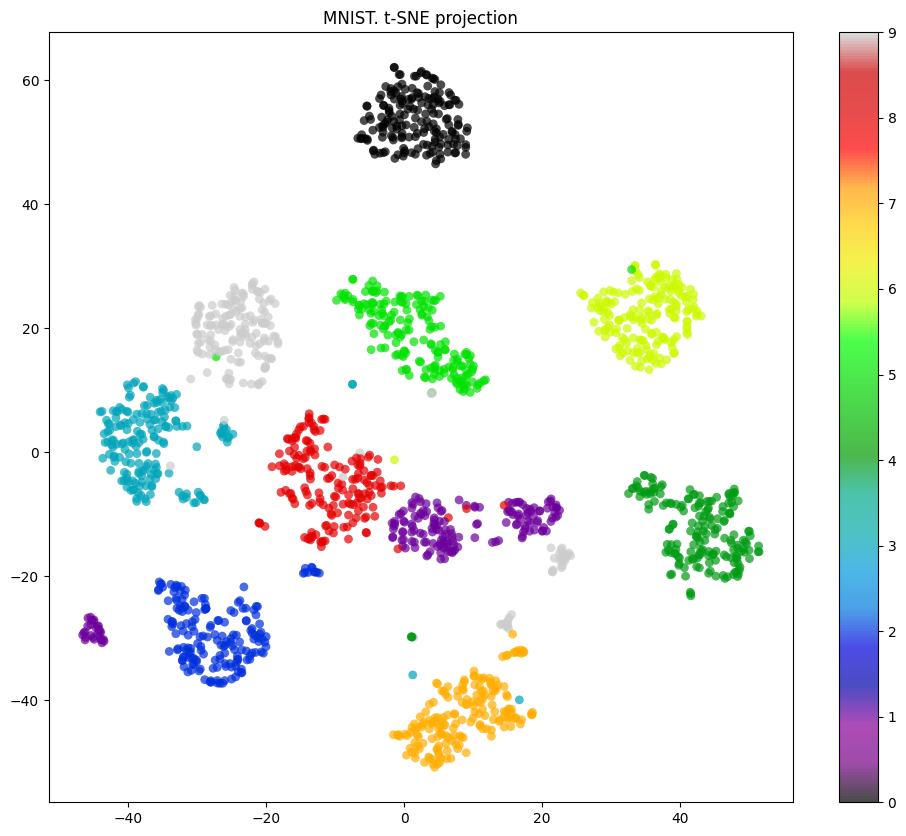

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=colormaps['nipy_spectral'])
plt.colorbar()
plt.title('MNIST. t-SNE projection')

In practice, we would choose the number of principal components such that we can explain 90% of the initial data dispersion (via the explained_variance_ratio). Here, that means retaining 21 principal components; therefore, we reduce the dimensionality from 64 features to 21.

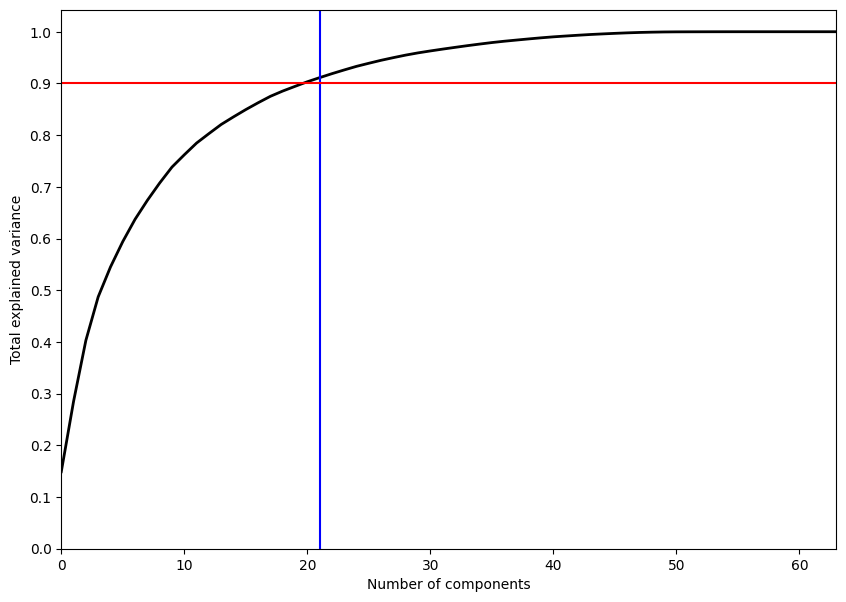

In [28]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();